In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data_dir = '/content/drive/MyDrive/Cotton Disease'
train_path = data_dir + '/train'
test_path = data_dir + '/test'
val_path = data_dir + '/val'

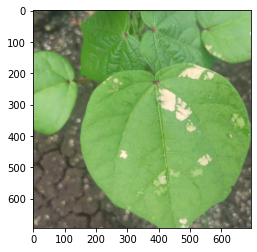

In [3]:
plt.imshow(imread(train_path+'/diseased cotton leaf/'+os.listdir(train_path+'/diseased cotton leaf')[0]))

In [4]:
dim1 = []
dim2 = []
image_shape = ()

for image_filename in os.listdir(train_path+'/diseased cotton leaf'):
  img = imread(train_path+'/diseased cotton leaf/'+image_filename)
  d1,d2,d3 = img.shape
  dim1.append(d1)
  dim2.append(d2)
    
dim1 = math.floor(np.average(np.array(dim1)))
dim2 = math.floor(np.average(np.array(dim2)))
dim3 = 3
image_shape = (dim1, dim2, dim3)

In [5]:
image_gen = ImageDataGenerator(rotation_range=60, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               rescale=1/255,
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')

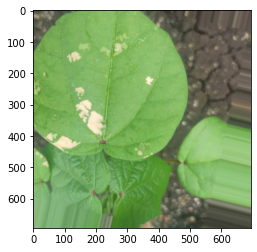

In [6]:
plt.imshow(image_gen.random_transform(imread(train_path+'/diseased cotton leaf/'+os.listdir(train_path+'/diseased cotton leaf')[0])))

In [7]:
train_data = image_gen.flow_from_directory(train_path,
                                           target_size=image_shape[:2],
                                           color_mode='rgb',
                                           batch_size=16,
                                           class_mode='categorical')

test_data = image_gen.flow_from_directory(test_path,
                                          target_size=image_shape[:2],
                                          color_mode='rgb',
                                          batch_size=16,
                                          class_mode='categorical')

val_data = image_gen.flow_from_directory(val_path,
                                         target_size=image_shape[:2],
                                         color_mode='rgb',
                                         batch_size=16,
                                         class_mode='categorical')

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=8)

In [9]:
model.fit(train_data, epochs=20, validation_data=val_data, callbacks=[early_stop])

Epoch 1/20
122/122 [==============================] - 247s 2s/step - loss: 1.3023 - accuracy: 0.4106 - val_loss: 1.3907 - val_accuracy: 0.3083
Epoch 2/20
122/122 [==============================] - 232s 2s/step - loss: 1.0914 - accuracy: 0.5064 - val_loss: 1.0595 - val_accuracy: 0.4743
Epoch 3/20
122/122 [==============================] - 228s 2s/step - loss: 0.9316 - accuracy: 0.6033 - val_loss: 0.8926 - val_accuracy: 0.5929
Epoch 4/20
122/122 [==============================] - 230s 2s/step - loss: 0.7283 - accuracy: 0.6940 - val_loss: 0.9392 - val_accuracy: 0.6087
Epoch 5/20
122/122 [==============================] - 229s 2s/step - loss: 0.5971 - accuracy: 0.7678 - val_loss: 0.5775 - val_accuracy: 0.6957
Epoch 6/20
122/122 [==============================] - 227s 2s/step - loss: 0.5080 - accuracy: 0.7986 - val_loss: 0.5236 - val_accuracy: 0.8063
Epoch 7/20
122/122 [==============================] - 232s 2s/step - loss: 0.4514 - accuracy: 0.8278 - val_loss: 0.3230 - val_accuracy: 0.8735

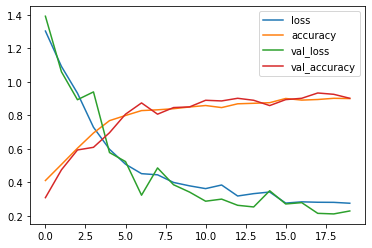

In [10]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [11]:
model.evaluate(test_data)

7/7 [==============================] - 14s 2s/step - loss: 0.1925 - accuracy: 0.9245


[0.1924915313720703, 0.9245283007621765]

In [16]:
model.save('cotton_disease_detection.h5')